<a href="https://colab.research.google.com/github/HR0262/AI-in-transportation-assignments/blob/main/project/projectcode_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
portal_current =  0

# **evaluation dataset**

## all data extraction
x_evaluation
y_evaluation

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv("evaluation_dataset.csv",sep=";")
train_df

,DP_ID,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW
0,1254,"E4S 55,620",20220101,04:00:00,240,48,16,8,4,26.40,1.0
1,1443,"E4S 57,055",20220101,04:00:00,240,48,16,8,4,24.43,3.0
2,1079,"E4S 56,780",20220101,04:00:00,240,48,16,8,4,20.33,4.0
3,1076,"E4S 55,620",20220101,04:00:00,240,48,16,8,4,18.55,4.0
4,751,"E4S 55,620",20220101,04:00:00,240,48,16,8,4,22.19,7.0
...,...,...,...,...,...,...,...,...,...,...,...
803372,351,"E4S 56,490",20220625,10:00:00,600,120,40,20,10,19.76,13.0
803373,353,"E4S 57,055",20220625,10:00:00,600,120,40,20,10,18.37,13.0
803374,536,"E4S 56,160",20220625,10:00:00,600,120,40,20,10,23.50,16.0
803375,749,"E4S 57,055",20220625,10:00:00,600,120,40,20,10,20.20,21.0


In [81]:
# new dataframe for sum speed and flow
portal_avg_df = train_df.groupby(['PORTAL', 'Date', 'Time'], as_index=False).agg({
    'Interval_1': 'first',  # Keep the first value of the interval column
    'Interval_5': 'first',
    'Interval_15': 'first',
    'Interval_30': 'first',
    'Interval_60': 'first',
    'SPEED_MS_AVG': 'mean',  # Calculate average speed
    'FLOW': 'sum'  # Calculate sum flow
})

# sorting the value to original
portal_avg_df = portal_avg_df.sort_values(by=['Date', 'Time'])

# Save to CSV
# portal_avg_df.to_csv('portal_avg_speed_flow_with_intervals.csv', index=False)

# show data
portal_avg_df

,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW
0,"E4S 55,620",20220101,04:00:00,240,48,16,8,4,22.380000,12.0
31527,"E4S 56,160",20220101,04:00:00,240,48,16,8,4,23.800000,8.0
63053,"E4S 56,490",20220101,04:00:00,240,48,16,8,4,22.737500,11.0
95385,"E4S 56,780",20220101,04:00:00,240,48,16,8,4,20.996667,8.0
127695,"E4S 57,055",20220101,04:00:00,240,48,16,8,4,21.630000,10.0
...,...,...,...,...,...,...,...,...,...,...
95384,"E4S 56,490",20220625,10:00:00,600,120,40,20,10,21.115000,39.0
127694,"E4S 56,780",20220625,10:00:00,600,120,40,20,10,20.145000,40.0
159241,"E4S 57,055",20220625,10:00:00,600,120,40,20,10,20.243333,45.0
191164,"E4S 57,435",20220625,10:00:00,600,120,40,20,10,20.836667,24.0


In [82]:
# Get the unique portal values
portal_ids = portal_avg_df['PORTAL'].unique()

# Create a dictionary to hold the split dataframes
portal_avg_dfs = {}

# Loop through each PORTAL and create a separate dataframe
for portal_id in portal_ids:
    portal_avg_dfs[f'portal_avg_df_{portal_id}'] = portal_avg_df[portal_avg_df['PORTAL'] == portal_id]
print(portal_ids)

['E4S 55,620' 'E4S 56,160' 'E4S 56,490' 'E4S 56,780' 'E4S 57,055'
 'E4S 57,435' 'E4S 57,820' 'E4S 58,140']


In [83]:
from datetime import datetime
# 创建一个空的列表来存储每个portal的向量化数据集  Create an empty list to store the vectorised dataset for each portal
vectorized_portal_datasets = []
nintvals=361
# 首先，找到所有portal中出现的唯一的日期  First, find the unique date that appears in all portals
all_days = set()
for portal in portal_ids:
    df = portal_avg_dfs[f'portal_avg_df_{portal}']
    df_sorted = df.sort_values(["Date", "Interval_1"])
    all_days.update(df_sorted['Date'].unique())
all_days = sorted(all_days)
all_days_formatted = [datetime.strptime(str(day), '%Y%m%d').date() for day in all_days]
print(all_days)

# 循环遍历每个portal  Loop through each portal
for portal in portal_ids:
    df = portal_avg_dfs[f'portal_avg_df_{portal}']
    df_sorted = df.sort_values(["Date", "Interval_1"])

    # 提取唯一的日期  Extract unique date
    days = np.unique(df_sorted['Date'].values)

    # 计算总天数  Calculate the total number of days
    ndays = len(days)

    # 按日期分组  Grouping by date
    day_subsets_df = df_sorted.groupby(["Date"])

    # 创建一个填满NaN值的矩阵  Create a matrix filled with NaN values
    vectorized_day_dataset = np.full((len(all_days), nintvals), np.nan)

    # 循环遍历每个唯一的天  Loop through each unique day
    for i, day in enumerate(all_days):
        if day in days:
            df_t = day_subsets_df.get_group(day)

            # 循环遍历当前天的DataFrame的每一行  Loop through each row of the DataFrame for the current day
            for j in range(len(df_t)):
                # 提取"Interval_1"和"FLOW"值，并填充'vectorized_day_dataset'  Extract the 'Interval_1' and 'FLOW' values and populate the 'vectorized_day_dataset'
                interval_index = df_t.iloc[j]["Interval_1"] - 240
                if 0 <= interval_index < nintvals:  # 确保索引有效  Make sure the index is valid
                    vectorized_day_dataset[i, interval_index] = df_t.iloc[j]["FLOW"]

    # 将当前portal的向量化数据集添加到列表中  Add the vectorised dataset of the current portal to the list
    vectorized_portal_datasets.append(vectorized_day_dataset)

# 将所有向量化数据集合并为一个大的三维数组  Merge all vectorised datasets into one large 3D array
final_vectorized_dataset = np.array(vectorized_portal_datasets)

# 打印结果  Print the results
print(final_vectorized_dataset)
print(final_vectorized_dataset.shape)

[20220101, 20220102, 20220103, 20220104, 20220107, 20220109, 20220110, 20220111, 20220112, 20220113, 20220114, 20220116, 20220118, 20220121, 20220122, 20220125, 20220126, 20220128, 20220130, 20220131, 20220203, 20220205, 20220206, 20220210, 20220211, 20220219, 20220220, 20220221, 20220223, 20220224, 20220228, 20220303, 20220306, 20220307, 20220309, 20220311, 20220312, 20220314, 20220315, 20220316, 20220317, 20220320, 20220321, 20220323, 20220324, 20220326, 20220328, 20220330, 20220402, 20220403, 20220405, 20220406, 20220407, 20220409, 20220410, 20220413, 20220415, 20220419, 20220420, 20220426, 20220427, 20220430, 20220502, 20220503, 20220504, 20220505, 20220511, 20220512, 20220513, 20220514, 20220515, 20220516, 20220517, 20220519, 20220520, 20220521, 20220524, 20220529, 20220602, 20220604, 20220606, 20220610, 20220615, 20220618, 20220619, 20220620, 20220622, 20220623, 20220624, 20220625]


<ipython-input-83-ff6e5d0f9f36>:35: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_subsets_df.get_group(day)


[[[12.  9.  7. ... 12.  7. 18.]
  [ 1.  4.  7. ... 31. 34. 29.]
  [ 9.  5. 12. ... 46. 39. 46.]
  ...
  [40. 25. 28. ... 71. 83. 70.]
  [ 7. 10. 10. ... 47. 44. 36.]
  [ 2.  3.  6. ... 29. 48. 50.]]

 [[ 8.  9.  4. ... 15. 13. 15.]
  [ 2.  4.  5. ... 40. 25. 34.]
  [ 9.  8.  8. ... 47. 46. 33.]
  ...
  [33. 25. 31. ... 94. 62. 60.]
  [ 6. 11. 11. ... 42. 52. 28.]
  [ 2.  5.  4. ... 29. 38. 52.]]

 [[11.  7.  7. ...  9. 12. 18.]
  [ 1.  9. nan ... 43. 31. 29.]
  [ 7. 16.  6. ... 46. 58. 35.]
  ...
  [28. 25. 32. ... 93. 76. 59.]
  [ 5. 12.  9. ... 32. 43. 24.]
  [ 3.  6.  5. ... 30. 28. 39.]]

 ...

 [[10. 12. 14. ...  6.  7.  8.]
  [ 2.  5.  3. ... 26. 23. 18.]
  [ 6.  3.  4. ... 45. 40. 43.]
  ...
  [ 6.  6.  7. ... 49. 56. 59.]
  [ 8.  5.  4. ... 50. 50. 48.]
  [ 9. 11.  3. ... 20. 20. 24.]]

 [[ 8. 14. 12. ...  6.  7. 11.]
  [ 4.  2.  8. ... 21. 21. 20.]
  [ 8.  3.  2. ... 39. 43. 42.]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan n

In [84]:
#提取speed  Extraction speed
vectorized_portal_datasets=[]
for portal in portal_ids:

    df = portal_avg_dfs[f'portal_avg_df_{portal}']
    df_sorted = df.sort_values(["Date", "Interval_1"])

    # 提取唯一的日期  Extract unique date
    days = np.unique(df_sorted['Date'].values)

    # 计算总天数  Calculate the total number of days
    ndays = len(days)

    # 按日期分组  Grouping by date
    day_subsets_df = df_sorted.groupby(["Date"])

    # 创建一个填满NaN值的矩阵  Create a matrix filled with NaN values
    vectorized_day_dataset = np.full((len(all_days), nintvals), np.nan)

    # 循环遍历每个唯一的天  Loop through each unique day
    for i, day in enumerate(all_days):
        if day in days:
            df_t = day_subsets_df.get_group(day)

            # 循环遍历当前天的DataFrame的每一行  Loop through each row of the DataFrame for the current day
            for j in range(len(df_t)):
                # 提取"Interval_1"和"FLOW"值，并填充'vectorized_day_dataset'  Extract the 'Interval_1' and 'FLOW' values and populate the 'vectorized_day_dataset'
                interval_index = df_t.iloc[j]["Interval_1"] - 240
                if 0 <= interval_index < nintvals:  # 确保索引有效  Make sure the index is valid
                    vectorized_day_dataset[i, interval_index] = df_t.iloc[j]["SPEED_MS_AVG"]
    # 将当前portal的向量化数据集添加到列表中  Add the vectorised dataset of the current portal to the list
    vectorized_portal_datasets.append(vectorized_day_dataset)

# 将所有向量化数据集合并为一个大的三维数组  Merge all vectorised datasets into one large 3D array
final_vectorized_dataset_speed = np.array(vectorized_portal_datasets)

# 打印结果  Print the results
print(final_vectorized_dataset_speed)
print(final_vectorized_dataset_speed.shape)

<ipython-input-84-a8515002362a>:23: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_subsets_df.get_group(day)


[[[22.38       22.56       22.275      ... 21.17333333 21.01
   22.69      ]
  [18.9        19.925      18.8        ... 20.25666667 21.67
   20.03      ]
  [22.52666667 22.29       22.105      ... 20.68666667 21.28
   19.69      ]
  ...
  [23.20333333 23.59       22.43333333 ... 18.3        18.01666667
   19.16      ]
  [23.925      22.71       23.81       ... 21.03666667 21.13
   22.12333333]
  [22.35       21.83333333 23.035      ... 21.18333333 19.16333333
   20.15      ]]

 [[23.8        25.09       22.665      ... 23.39333333 22.07
   22.24      ]
  [18.6        23.95       19.46       ... 21.29666667 22.45666667
   22.54      ]
  [23.165      22.185      25.08       ... 21.66333333 21.14
   21.78      ]
  ...
  [24.04333333 24.95       22.99666667 ... 19.21333333 20.91
   20.42666667]
  [23.375      23.03       23.975      ... 21.86333333 22.65
   21.43      ]
  [24.7        23.2        25.13333333 ... 20.26333333 21.75666667
   21.69333333]]

 [[22.7375     22.6075     21.323333

## change portal current here


In [85]:
#choose different portal for training, E4S 55,620, the first one in this place
vectorized_day_dataset_speed0 = final_vectorized_dataset_speed[portal_current]
vectorized_day_dataset_flow0 = final_vectorized_dataset[portal_current]
print(vectorized_day_dataset_speed0)
print(vectorized_day_dataset_flow0)

[[22.38       22.56       22.275      ... 21.17333333 21.01
  22.69      ]
 [18.9        19.925      18.8        ... 20.25666667 21.67
  20.03      ]
 [22.52666667 22.29       22.105      ... 20.68666667 21.28
  19.69      ]
 ...
 [23.20333333 23.59       22.43333333 ... 18.3        18.01666667
  19.16      ]
 [23.925      22.71       23.81       ... 21.03666667 21.13
  22.12333333]
 [22.35       21.83333333 23.035      ... 21.18333333 19.16333333
  20.15      ]]
[[12.  9.  7. ... 12.  7. 18.]
 [ 1.  4.  7. ... 31. 34. 29.]
 [ 9.  5. 12. ... 46. 39. 46.]
 ...
 [40. 25. 28. ... 71. 83. 70.]
 [ 7. 10. 10. ... 47. 44. 36.]
 [ 2.  3.  6. ... 29. 48. 50.]]


[ 6  4  4  8  4  6  4  4  4  4 10  4  4  4  4  8  6  4  4  4  4  4  4  4
  4  6  4  6  4  4  6  4  6  4  4  6  4  4  4  4  8  4  4  4  4  4  6  4
  4  4  6  4  4  4  4  4  4  4  4  4  8  4  4  6  4  6  4  4  4  4  4  4
  4  4  6  6  4  4  4  4  8  4  4  4  4  6  4  4  4  4  6  6  4  4  4  6
  4  4  4  4  6  4  4  4  4  6  4  4  4  4  6  4  4  4  4  4  4  4  4  4
  6  4  4  4  4  4  4  4  4  4  4  4  4  4  4  8  4  4  4  4  8  4  4  4
  4  6  6  4  4  4  4  4  4  4  4  8  6  4  4  4 10  6  6  4  4  6  4  4
  4  4  8  4  4  4  4 12  4  4  4  4  8  4  4  4  4  6  4  4  4  4  6  4
  4  4  4  8  4  4  4  4  8  4  4  4  4  6  4  4  4  4  4  4  4  4  4  6
  4  4  4  4  6  4  4  4  4  6  4  4  4  4  6  4  4  4  4  6  4  4  4  4
  6  4  4  4  4  6  6  6  6  6  6  6  6  6  6  8  6  6  6  6  8  6  6  6
  6 10  6  6  6  6  6  6  6  6  6  8  6  6  6  8  8  6  6  6  6  8  6  6
  6  6  6  6  6  6  6  8  6  6  6  6  6  6  6  8  8 10  8  8  8  8 10  8
  8  8  8 10  8  8  8  8 12  8  8  6  6  8  6  6  6

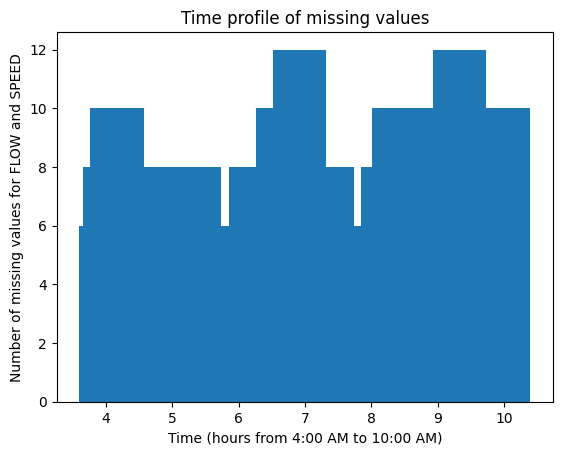

In [86]:
# Calculate the number of missing values per 1-minute interval
nans_per_time_all_portals = np.zeros(361,)

# # 循环遍历每个portal  Loop through each portal
# for i in range(8):
#     # 计算当前portal的每个时间间隔的缺失值数量  Count the number of missing values for each time interval of the current portal
#     nans_per_time = np.sum(np.isnan(final_vectorized_dataset[i]), axis=0)
#     # 累加到总缺失值数组  Accumulate to an array of total missing values
#     nans_per_time_all_portals += nans_per_time

nans_per_time_all_portals = np.sum(np.isnan(vectorized_day_dataset_speed0), axis=0) + np.sum(np.isnan(vectorized_day_dataset_flow0), axis=0)
print(nans_per_time_all_portals)
print(nans_per_time_all_portals.shape)

# Define the number of 1-minute intervals between 4:00 AM and 10:00 AM
nintvals = 361  # 6 hours * 60 minutes = 360 intervals

# Create an array 'x_axis' representing the 1-minute intervals
x_axis = np.arange(0, nintvals, 1, dtype=int)

# Initialize an empty list 'x_axis_hours' to store time values in hours
x_axis_hours = []

# Convert interval indices to hours and append them to 'x_axis_hours'
for i in range(0, len(x_axis)):
    x_axis_hours.append(4 + float(x_axis[i]) / 60)  # Start at 4 AM, and each interval is 1 minute

# Plot the number of missing values over time
fig, ax = plt.subplots()
ax.bar(x_axis_hours, height=nans_per_time_all_portals)
print(sum(nans_per_time_all_portals)/(8*214*361))
# Set labels and title
ax.set_ylabel('Number of missing values for FLOW and SPEED')
ax.set_xlabel('Time (hours from 4:00 AM to 10:00 AM)')
ax.set_title('Time profile of missing values')

# Display the plot
plt.show()

In [87]:
# final_vectorized_dataset_2d = final_vectorized_dataset.transpose(1, 0, 2).reshape(-1, final_vectorized_dataset.shape[2])
# print(final_vectorized_dataset_2d)
# print(final_vectorized_dataset_2d.shape)

In [88]:
# #插值  interpolation

# 自定义函数进行周期性插值  Custom functions for periodic interpolation
def periodic_interpolation(df, period):
    df = pd.DataFrame(df)
    # 对于每一列（代表一个时间间隔）  For each column (representing a time interval)
    for col in df.columns:
        # 遍历每一行  Go through each row
        for i in range(len(df)):
            # 如果当前行有缺失值  If the current row has a missing value
            if np.isnan(df[col][i]):
                # 向前找到当前周期中对应的行（例如，如果今天是星期三，我们查看上一个星期三）  Move forward to find the corresponding row in the current period (e.g. if today is Wednesday, we look at the previous Wednesday)
                idx_left = (i + period) % len(df)
                # 如果对应的行也有缺失值，继续向后查找直到找到非缺失值  If the corresponding row also has a missing value, continue looking backwards until you find a non-missing value
                while np.isnan(df[col][idx_left]) and idx_left>=0:
                    idx_left = (idx_left + period) % len(df)
                # 向后找  Look backwards
                idx_right = (i + period) % len(df)
                while np.isnan(df[col][idx_right]) and idx_right<len(df):
                    idx_right = (idx_right + period) % len(df)
                # 用找到的非缺失值线性填充当前缺失值  The currently missing value is linearly populated with the found non-missing value
                if idx_right>=len(df):
                  df[col][i] = df[col][idx_left]
                elif idx_left<=0:
                  df[col][i] = df[col][idx_right]
                else:
                  df[col][i] = np.mean([df[col][idx_left], df[col][idx_right]])
    df = df.to_numpy()
    return df

# # 应用周期性插值  Apply periodic interpolation
# df_interpolated = periodic_interpolation(df, 7*8)


# # 将插值后的 DataFrame 转换回 NumPy 数组  Convert the interpolated DataFrame back to a NumPy array
# final_vectorized_dataset_2d = df_interpolated.to_numpy()

# print(final_vectorized_dataset_2d)
# print(final_vectorized_dataset_2d.shape)

In [89]:
vectorized_day_dataset_speed0_interpolated = periodic_interpolation(vectorized_day_dataset_speed0, 7)
vectorized_day_dataset_flow0_interpolated = periodic_interpolation(vectorized_day_dataset_flow0, 7)
print(vectorized_day_dataset_speed0_interpolated)
print(vectorized_day_dataset_flow0_interpolated)
print(vectorized_day_dataset_speed0_interpolated.shape)
print(vectorized_day_dataset_flow0_interpolated.shape)


<ipython-input-88-7ecf59720e92>:27: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][i] = np.mean([df[col][idx_left], df[col][idx_right]])


[[22.38       22.56       22.275      ... 21.17333333 21.01
  22.69      ]
 [18.9        19.925      18.8        ... 20.25666667 21.67
  20.03      ]
 [22.52666667 22.29       22.105      ... 20.68666667 21.28
  19.69      ]
 ...
 [23.20333333 23.59       22.43333333 ... 18.3        18.01666667
  19.16      ]
 [23.925      22.71       23.81       ... 21.03666667 21.13
  22.12333333]
 [22.35       21.83333333 23.035      ... 21.18333333 19.16333333
  20.15      ]]
[[12.  9.  7. ... 12.  7. 18.]
 [ 1.  4.  7. ... 31. 34. 29.]
 [ 9.  5. 12. ... 46. 39. 46.]
 ...
 [40. 25. 28. ... 71. 83. 70.]
 [ 7. 10. 10. ... 47. 44. 36.]
 [ 2.  3.  6. ... 29. 48. 50.]]
(90, 361)
(90, 361)


In [90]:
nans_per_day = np.sum(np.isnan(vectorized_day_dataset_speed0_interpolated),1)
print('number of days with missing value',np.size(np.where(nans_per_day > 0),1))
nans_per_day = np.sum(np.isnan(vectorized_day_dataset_flow0_interpolated),1)
print('number of days with missing value',np.size(np.where(nans_per_day > 0),1))

number of days with missing value 0
number of days with missing value 0


In [91]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

#clusters = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(vectorized_day_dataset)

Time series for forecasting----xgboost prediction

mashine learning--30speed, 30flow, 2labels
lstm--30speed, 30flow


In [92]:
# print(final_vectorized_dataset_2d)  #not yet take the clustering into consideration
# print(final_vectorized_dataset_2d.shape)
print(vectorized_day_dataset_speed0_interpolated)
print(vectorized_day_dataset_flow0_interpolated)
print(vectorized_day_dataset_speed0_interpolated.shape)
print(vectorized_day_dataset_flow0_interpolated.shape)

[[22.38       22.56       22.275      ... 21.17333333 21.01
  22.69      ]
 [18.9        19.925      18.8        ... 20.25666667 21.67
  20.03      ]
 [22.52666667 22.29       22.105      ... 20.68666667 21.28
  19.69      ]
 ...
 [23.20333333 23.59       22.43333333 ... 18.3        18.01666667
  19.16      ]
 [23.925      22.71       23.81       ... 21.03666667 21.13
  22.12333333]
 [22.35       21.83333333 23.035      ... 21.18333333 19.16333333
  20.15      ]]
[[12.  9.  7. ... 12.  7. 18.]
 [ 1.  4.  7. ... 31. 34. 29.]
 [ 9.  5. 12. ... 46. 39. 46.]
 ...
 [40. 25. 28. ... 71. 83. 70.]
 [ 7. 10. 10. ... 47. 44. 36.]
 [ 2.  3.  6. ... 29. 48. 50.]]
(90, 361)
(90, 361)


Need to split the data into x-62 values, y-next minute values

Remember to divide into training set validation set



In [94]:
import datetime
date_str = str(all_days[5])
date_str = date_str[:4] + '-' + date_str[4:6] + '-' + date_str[6:]
print(date_str)
date_obj = datetime.datetime.strptime(date_str, '%Y-%m-%d').date()
if date_obj.weekday() == 5 or date_obj.weekday() == 6:
  print(1)
else:
  print(0)

2022-01-09
1


In [95]:
import numpy as np
import datetime
from sklearn.preprocessing import OneHotEncoder

def datadivide(arr, all_days = [], cluster_labels = [], lag_size = 30, weekend = False, startday = 0, time = 0):
  print(arr.shape)
  rows, columns = arr.shape

  x = []
  y = []

  # Number of input data
  lag_size = 30

  # encoder = OneHotEncoder()
  # one_hot_labels = encoder.fit_transform(cluster_labels.reshape(-1, 1))
  # one_hot_labels = one_hot_labels.toarray()

  # 遍历数组，除了最后 lag_size 个元素  Iterate through the array, except for the last lag_size elements
  for i in range(rows):
    for j in range(columns - lag_size):
      # if cluster_labels[i] == 0:
        # 对于每个时间步长，创建一个包含前 lag_size 个元素的 x 特征数组  For each time step, create an array of x-features containing the first lag_size elements
        x_features = arr[i][j:j+lag_size].flatten()
        # y 是当前时间步长的数据  y is the data for the current time step
        y_value = np.mean(arr[i][j+lag_size:j+lag_size+15])
        # 加入聚类结果  Add clustering results
        if len(cluster_labels)>0:
          x_features = np.append(x_features, cluster_labels[i])
        # 加入当前时间  Add the current time
        if time:
          x_features = np.append(x_features, j//time)
        # x_features = np.append(x_features, i%8)
        # 加入当天的flow_aver  Join the flow_aver of the day
        # flow_aver = np.average(vectorized_day_dataset[i])
        # x_features = np.append(x_features, flow_aver)
        # if weekend:
        #   if i%7+startday ==6 or i%7+startday ==7:
        #     x_features = np.append(x_features, 1)
        #   else:
        #     x_features = np.append(x_features, 0)
        if len(all_days) > 0:
          date_str = str(all_days[i])
          date_str = date_str[:4] + '-' + date_str[4:6] + '-' + date_str[6:]
          date_obj = datetime.datetime.strptime(date_str, '%Y-%m-%d').date()
          if date_obj.weekday() == 5 or date_obj.weekday() == 6:
              x_features = np.append(x_features, 1)
          else:
              x_features = np.append(x_features, 0)


        # 将它们添加到相应的列表中  Add them to the appropriate list
        x.append(x_features)
        y.append(y_value)

  # translate it to NumPy array
  x = np.array(x)
  y = np.array(y)

  return x, y

In [96]:
x1, y1 = datadivide(vectorized_day_dataset_speed0_interpolated)
x2, y2 = datadivide(vectorized_day_dataset_flow0_interpolated, all_days = all_days, cluster_labels= [], time=5, weekend = True, startday = 2)
x = np.concatenate((x1, x2), axis=1)
y = y2
print(x)
print(x.shape)
print(y.shape)
x_evaluation = x
y_evaluation = y

(90, 361)
(90, 361)
[[22.38       22.56       22.275      ...  8.          0.
   1.        ]
 [22.56       22.275      22.3        ... 14.          0.
   1.        ]
 [22.275      22.3        23.215      ...  7.          0.
   1.        ]
 ...
 [21.98333333 21.06666667 22.20666667 ... 41.         65.
   1.        ]
 [21.06666667 22.20666667 21.31666667 ... 29.         65.
   1.        ]
 [22.20666667 21.31666667 22.92666667 ... 48.         66.
   1.        ]]
(29790, 62)
(29790,)


# **training dataset**

## all data extraction

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv("training_dataset.csv",sep=";")
train_df

,DP_ID,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW
0,543,"E4S 56,780",20210601,04:00:00,240,48,16,8,4,19.34,10.0
1,539,"E4S 56,160",20210601,04:00:00,240,48,16,8,4,19.64,9.0
2,534,"E4S 56,780",20210601,04:00:00,240,48,16,8,4,23.36,5.0
3,351,"E4S 56,490",20210601,04:00:00,240,48,16,8,4,20.14,7.0
4,353,"E4S 57,055",20210601,04:00:00,240,48,16,8,4,17.70,7.0
...,...,...,...,...,...,...,...,...,...,...,...
1921962,353,"E4S 57,055",20211231,10:00:00,600,120,40,20,10,17.45,11.0
1921963,543,"E4S 56,780",20211231,10:00:00,600,120,40,20,10,18.09,11.0
1921964,153,"E4S 56,490",20211231,10:00:00,600,120,40,20,10,23.53,7.0
1921965,351,"E4S 56,490",20211231,10:00:00,600,120,40,20,10,18.49,9.0


In [98]:
# new dataframe for sum speed and flow
portal_avg_df = train_df.groupby(['PORTAL', 'Date', 'Time'], as_index=False).agg({
    'Interval_1': 'first',  # Keep the first value of the interval column
    'Interval_5': 'first',
    'Interval_15': 'first',
    'Interval_30': 'first',
    'Interval_60': 'first',
    'SPEED_MS_AVG': 'mean',  # Calculate average speed
    'FLOW': 'sum'  # Calculate sum flow
})

# sorting the value to original
portal_avg_df = portal_avg_df.sort_values(by=['Date', 'Time'])

# Save to CSV
# portal_avg_df.to_csv('portal_avg_speed_flow_with_intervals.csv', index=False)

# show data
portal_avg_df

,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW
0,"E4S 55,620",20210601,04:00:00,240,48,16,8,4,22.110000,29.0
74333,"E4S 56,160",20210601,04:00:00,240,48,16,8,4,23.326667,28.0
148548,"E4S 56,490",20210601,04:00:00,240,48,16,8,4,21.460000,24.0
224995,"E4S 56,780",20210601,04:00:00,240,48,16,8,4,20.047500,27.0
301341,"E4S 57,055",20210601,04:00:00,240,48,16,8,4,20.520000,27.0
...,...,...,...,...,...,...,...,...,...,...
301340,"E4S 56,780",20211231,10:00:00,600,120,40,20,10,17.907500,40.0
375372,"E4S 57,055",20211231,10:00:00,600,120,40,20,10,18.993333,42.0
451461,"E4S 57,435",20211231,10:00:00,600,120,40,20,10,21.206667,25.0
527686,"E4S 57,820",20211231,10:00:00,600,120,40,20,10,21.106667,20.0


In [99]:
# Get the unique portal values
portal_ids = portal_avg_df['PORTAL'].unique()

# Create a dictionary to hold the split dataframes
portal_avg_dfs = {}

# Loop through each PORTAL and create a separate dataframe
for portal_id in portal_ids:
    portal_avg_dfs[f'portal_avg_df_{portal_id}'] = portal_avg_df[portal_avg_df['PORTAL'] == portal_id]
print(portal_ids)

['E4S 55,620' 'E4S 56,160' 'E4S 56,490' 'E4S 56,780' 'E4S 57,055'
 'E4S 57,435' 'E4S 57,820' 'E4S 58,140']


In [100]:
from datetime import datetime
# 创建一个空的列表来存储每个portal的向量化数据集  Create an empty list to store the vectorised dataset for each portal
vectorized_portal_datasets = []
nintvals=361
# 首先，找到所有portal中出现的唯一的日期  First, find the unique date that appears in all portals
all_days = set()
for portal in portal_ids:
    df = portal_avg_dfs[f'portal_avg_df_{portal}']
    df_sorted = df.sort_values(["Date", "Interval_1"])
    all_days.update(df_sorted['Date'].unique())
all_days = sorted(all_days)
all_days_formatted = [datetime.strptime(str(day), '%Y%m%d').date() for day in all_days]
print(all_days)

# 循环遍历每个portal  Loop through each portal
for portal in portal_ids:
    df = portal_avg_dfs[f'portal_avg_df_{portal}']
    df_sorted = df.sort_values(["Date", "Interval_1"])

    # 提取唯一的日期  Extract unique date
    days = np.unique(df_sorted['Date'].values)

    # 计算总天数  Calculate the total number of days
    ndays = len(days)

    # 按日期分组  Grouping by date
    day_subsets_df = df_sorted.groupby(["Date"])

    # 创建一个填满NaN值的矩阵  Create a matrix filled with NaN values
    vectorized_day_dataset = np.full((len(all_days), nintvals), np.nan)

    # 循环遍历每个唯一的天  Loop through each unique day
    for i, day in enumerate(all_days):
        if day in days:
            df_t = day_subsets_df.get_group(day)

            # 循环遍历当前天的DataFrame的每一行  Loop through each row of the DataFrame for the current day
            for j in range(len(df_t)):
                # 提取"Interval_1"和"FLOW"值，并填充'vectorized_day_dataset'  Extract the 'Interval_1' and 'FLOW' values and populate the 'vectorized_day_dataset'
                interval_index = df_t.iloc[j]["Interval_1"] - 240
                if 0 <= interval_index < nintvals:  # 确保索引有效  Make sure the index is valid
                    vectorized_day_dataset[i, interval_index] = df_t.iloc[j]["FLOW"]

    # 将当前portal的向量化数据集添加到列表中  Add the vectorised dataset of the current portal to the list
    vectorized_portal_datasets.append(vectorized_day_dataset)

# 将所有向量化数据集合并为一个大的三维数组  Merge all vectorised datasets into one large 3D array
final_vectorized_dataset = np.array(vectorized_portal_datasets)

# 打印结果  Print the results
print(final_vectorized_dataset)
print(final_vectorized_dataset.shape)

[20210601, 20210602, 20210603, 20210604, 20210605, 20210606, 20210607, 20210608, 20210609, 20210610, 20210611, 20210612, 20210613, 20210614, 20210615, 20210616, 20210617, 20210618, 20210619, 20210620, 20210621, 20210622, 20210623, 20210624, 20210625, 20210626, 20210627, 20210628, 20210629, 20210630, 20210701, 20210702, 20210703, 20210704, 20210705, 20210706, 20210707, 20210708, 20210709, 20210710, 20210711, 20210712, 20210713, 20210714, 20210715, 20210716, 20210717, 20210718, 20210719, 20210720, 20210721, 20210722, 20210723, 20210724, 20210725, 20210726, 20210727, 20210728, 20210729, 20210730, 20210731, 20210801, 20210802, 20210803, 20210804, 20210805, 20210806, 20210807, 20210808, 20210809, 20210810, 20210811, 20210812, 20210813, 20210814, 20210815, 20210816, 20210817, 20210818, 20210819, 20210820, 20210821, 20210822, 20210823, 20210824, 20210825, 20210826, 20210827, 20210828, 20210829, 20210830, 20210831, 20210901, 20210902, 20210903, 20210904, 20210905, 20210906, 20210907, 20210908,

<ipython-input-100-ff6e5d0f9f36>:35: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_subsets_df.get_group(day)


[[[29. 26. 38. ... 60. 46. 68.]
  [29. 23. 29. ... 54. 59. 59.]
  [37. 35. 36. ... 57. 40. 53.]
  ...
  [ 1.  6.  3. ... 50. 47. 45.]
  [ 6.  3.  6. ... 42. 46. 62.]
  [ 2.  3.  1. ... 24. 14. 16.]]

 [[28. 33. 42. ... 47. 59. 61.]
  [26. 29. 35. ... 54. 59. 52.]
  [34. 38. 27. ... 45. 49. 51.]
  ...
  [ 3.  4.  4. ... 50. 43. 56.]
  [ 4.  5.  6. ... 38. 54. 57.]
  [ 2.  1.  1. ... 14. 16. 27.]]

 [[24. 38. 43. ... 55. 64. 69.]
  [25. 35. 37. ... 60. 64. 57.]
  [35. 36. 34. ... 50. 55. 58.]
  ...
  [ 4.  6.  2. ... 49. 53. 62.]
  [ 3.  7.  7. ... 48. 58. 56.]
  [ 2.  3.  2. ... 18. 13. 42.]]

 ...

 [[ 4.  3.  5. ... 58. 54. 69.]
  [ 3.  2.  1. ... 58. 57. 66.]
  [ 8.  4.  6. ... 59. 61. 66.]
  ...
  [ 4.  1.  6. ... 49. 39. 44.]
  [ 2.  4.  8. ... 36. 40. 28.]
  [ 1.  3.  4. ... 22. 23. 25.]]

 [[ 4.  3.  7. ... 50. 60. 72.]
  [ 3.  1.  4. ... 60. 57. 60.]
  [ 8.  3.  7. ... 59. 52. 68.]
  ...
  [ 2.  3.  5. ... 48. 49. 30.]
  [ 1.  7.  7. ... 31. 43. 33.]
  [nan  4.  4. ... 18. 24. 2

In [101]:
#提取speed  Extraction speed
vectorized_portal_datasets=[]
for portal in portal_ids:

    df = portal_avg_dfs[f'portal_avg_df_{portal}']
    df_sorted = df.sort_values(["Date", "Interval_1"])

    # 提取唯一的日期  Extract unique date
    days = np.unique(df_sorted['Date'].values)

    # 计算总天数  Calculate the total number of days
    ndays = len(days)

    # 按日期分组  Grouping by date
    day_subsets_df = df_sorted.groupby(["Date"])

    # 创建一个填满NaN值的矩阵  Create a matrix filled with NaN values
    vectorized_day_dataset = np.full((len(all_days), nintvals), np.nan)

    # 循环遍历每个唯一的天  Loop through each unique day
    for i, day in enumerate(all_days):
        if day in days:
            df_t = day_subsets_df.get_group(day)

            # 循环遍历当前天的DataFrame的每一行  Loop through each row of the DataFrame for the current day
            for j in range(len(df_t)):
                # 提取"Interval_1"和"FLOW"值，并填充'vectorized_day_dataset'  Extract the 'Interval_1' and 'FLOW' values and populate the 'vectorized_day_dataset'
                interval_index = df_t.iloc[j]["Interval_1"] - 240
                if 0 <= interval_index < nintvals:  # 确保索引有效  Make sure the index is valid
                    vectorized_day_dataset[i, interval_index] = df_t.iloc[j]["SPEED_MS_AVG"]
    # 将当前portal的向量化数据集添加到列表中  Add the vectorised dataset of the current portal to the list
    vectorized_portal_datasets.append(vectorized_day_dataset)

# 将所有向量化数据集合并为一个大的三维数组  Merge all vectorised datasets into one large 3D array
final_vectorized_dataset_speed = np.array(vectorized_portal_datasets)

# 打印结果  Print the results
print(final_vectorized_dataset_speed)
print(final_vectorized_dataset_speed.shape)

<ipython-input-101-a8515002362a>:23: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_subsets_df.get_group(day)


[[[22.11       23.53333333 21.83       ... 19.09       17.96
   19.48333333]
  [23.61333333 22.45666667 22.78333333 ... 19.40333333 19.56666667
   19.52666667]
  [23.56666667 22.20666667 23.28       ... 19.89333333 19.85
   20.33666667]
  ...
  [18.6        19.77       19.9        ... 18.89       19.54333333
   19.15333333]
  [23.05       22.23       21.415      ... 20.14333333 19.26666667
   18.53333333]
  [21.4        25.35       20.3        ... 20.84       21.23666667
   22.44      ]]

 [[23.32666667 24.41       22.94666667 ... 20.08666667 20.12333333
   20.01333333]
  [25.17333333 23.93333333 23.44       ... 21.16666667 20.85666667
   20.42      ]
  [23.59       22.71333333 24.62       ... 21.77       20.76
   20.39666667]
  ...
  [18.125      20.95       20.865      ... 20.23333333 20.26666667
   19.82      ]
  [22.515      24.7        21.9        ... 21.01333333 20.04333333
   20.28333333]
  [25.7        26.1        20.8        ... 21.81       22.36666667
   21.29666667]]

 [[21.

## change portal current here


In [102]:
#choose different portal for training, E4S 55,620, the first one in this place
vectorized_day_dataset_speed0 = final_vectorized_dataset_speed[portal_current]
vectorized_day_dataset_flow0 = final_vectorized_dataset[portal_current]
print(vectorized_day_dataset_speed0)
print(vectorized_day_dataset_flow0)

[[22.11       23.53333333 21.83       ... 19.09       17.96
  19.48333333]
 [23.61333333 22.45666667 22.78333333 ... 19.40333333 19.56666667
  19.52666667]
 [23.56666667 22.20666667 23.28       ... 19.89333333 19.85
  20.33666667]
 ...
 [18.6        19.77       19.9        ... 18.89       19.54333333
  19.15333333]
 [23.05       22.23       21.415      ... 20.14333333 19.26666667
  18.53333333]
 [21.4        25.35       20.3        ... 20.84       21.23666667
  22.44      ]]
[[29. 26. 38. ... 60. 46. 68.]
 [29. 23. 29. ... 54. 59. 59.]
 [37. 35. 36. ... 57. 40. 53.]
 ...
 [ 1.  6.  3. ... 50. 47. 45.]
 [ 6.  3.  6. ... 42. 46. 62.]
 [ 2.  3.  1. ... 24. 14. 16.]]


[18 18 18 18 22 20 20 20 18 20 24 18 24 18 18 18 20 18 18 18 18 18 20 18
 18 18 20 18 20 18 18 18 18 18 18 18 18 18 18 22 18 18 18 18 18 18 18 18
 18 18 18 18 18 18 18 18 20 18 20 18 18 20 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 20 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 20 18 18 18 18 18 18 18 18 18 18 18 18 16 16 16 16 16 16 16 16 16 16 16
 16 16 16 16 16 18 18 18 18 18 16 16 16 16 16 16 16 18 18 18 18 18 18 18
 18 18 16 16 16 16 16 16 16 16 16 16 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 14 12 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 16 16 16 16 16 16 16 16 16 16
 16 16 16 16 14 14 14 14 14 14 14 14 14 14 14 16 14

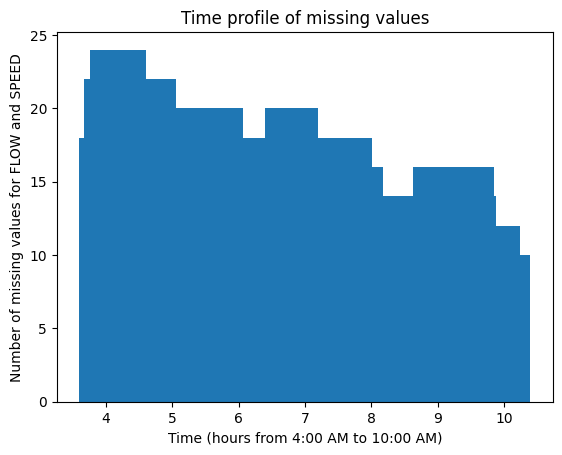

In [103]:
# Calculate the number of missing values per 1-minute interval
nans_per_time_all_portals = np.zeros(361,)

# # 循环遍历每个portal  Loop through each portal
# for i in range(8):
#     # 计算当前portal的每个时间间隔的缺失值数量  Count the number of missing values for each time interval of the current portal
#     nans_per_time = np.sum(np.isnan(final_vectorized_dataset[i]), axis=0)
#     # 累加到总缺失值数组  Accumulate to an array of total missing values
#     nans_per_time_all_portals += nans_per_time

nans_per_time_all_portals = np.sum(np.isnan(vectorized_day_dataset_speed0), axis=0) + np.sum(np.isnan(vectorized_day_dataset_flow0), axis=0)
print(nans_per_time_all_portals)
print(nans_per_time_all_portals.shape)

# Define the number of 1-minute intervals between 4:00 AM and 10:00 AM
nintvals = 361  # 6 hours * 60 minutes = 360 intervals

# Create an array 'x_axis' representing the 1-minute intervals
x_axis = np.arange(0, nintvals, 1, dtype=int)

# Initialize an empty list 'x_axis_hours' to store time values in hours
x_axis_hours = []

# Convert interval indices to hours and append them to 'x_axis_hours'
for i in range(0, len(x_axis)):
    x_axis_hours.append(4 + float(x_axis[i]) / 60)  # Start at 4 AM, and each interval is 1 minute

# Plot the number of missing values over time
fig, ax = plt.subplots()
ax.bar(x_axis_hours, height=nans_per_time_all_portals)
print(sum(nans_per_time_all_portals)/(8*214*361))
# Set labels and title
ax.set_ylabel('Number of missing values for FLOW and SPEED')
ax.set_xlabel('Time (hours from 4:00 AM to 10:00 AM)')
ax.set_title('Time profile of missing values')

# Display the plot
plt.show()

In [104]:
# final_vectorized_dataset_2d = final_vectorized_dataset.transpose(1, 0, 2).reshape(-1, final_vectorized_dataset.shape[2])
# print(final_vectorized_dataset_2d)
# print(final_vectorized_dataset_2d.shape)

In [105]:
# #插值  interpolation

# 自定义函数进行周期性插值  Custom functions for periodic interpolation
def periodic_interpolation(df, period):
    df = pd.DataFrame(df)
    # 对于每一列（代表一个时间间隔）  For each column (representing a time interval)
    for col in df.columns:
        # 遍历每一行  Go through each row
        for i in range(len(df)):
            # 如果当前行有缺失值  If the current row has a missing value
            if np.isnan(df[col][i]):
                # 向前找到当前周期中对应的行（例如，如果今天是星期三，我们查看上一个星期三）  Move forward to find the corresponding row in the current period (e.g. if today is Wednesday, we look at the previous Wednesday)
                idx_left = (i + period) % len(df)
                # 如果对应的行也有缺失值，继续向后查找直到找到非缺失值  If the corresponding row also has a missing value, continue looking backwards until you find a non-missing value
                while np.isnan(df[col][idx_left]) and idx_left>=0:
                    idx_left = (idx_left + period) % len(df)
                # 向后找  Look backwards
                idx_right = (i + period) % len(df)
                while np.isnan(df[col][idx_right]) and idx_right<len(df):
                    idx_right = (idx_right + period) % len(df)
                # 用找到的非缺失值线性填充当前缺失值  The currently missing value is linearly populated with the found non-missing value
                if idx_right>=len(df):
                  df[col][i] = df[col][idx_left]
                elif idx_left<=0:
                  df[col][i] = df[col][idx_right]
                else:
                  df[col][i] = np.mean([df[col][idx_left], df[col][idx_right]])
    df = df.to_numpy()
    return df

# # 应用周期性插值  Apply periodic interpolation
# df_interpolated = periodic_interpolation(df, 7*8)


# # 将插值后的 DataFrame 转换回 NumPy 数组  Convert the interpolated DataFrame back to a NumPy array
# final_vectorized_dataset_2d = df_interpolated.to_numpy()

# print(final_vectorized_dataset_2d)
# print(final_vectorized_dataset_2d.shape)

In [106]:
vectorized_day_dataset_speed0_interpolated = periodic_interpolation(vectorized_day_dataset_speed0, 7)
vectorized_day_dataset_flow0_interpolated = periodic_interpolation(vectorized_day_dataset_flow0, 7)
print(vectorized_day_dataset_speed0_interpolated)
print(vectorized_day_dataset_flow0_interpolated)


<ipython-input-105-7ecf59720e92>:27: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][i] = np.mean([df[col][idx_left], df[col][idx_right]])
<ipython-input-105-7ecf59720e92>:25: FutureWarning: ChainedAssignmentError: behaviour will chang

[[22.11       23.53333333 21.83       ... 19.09       17.96
  19.48333333]
 [23.61333333 22.45666667 22.78333333 ... 19.40333333 19.56666667
  19.52666667]
 [23.56666667 22.20666667 23.28       ... 19.89333333 19.85
  20.33666667]
 ...
 [18.6        19.77       19.9        ... 18.89       19.54333333
  19.15333333]
 [23.05       22.23       21.415      ... 20.14333333 19.26666667
  18.53333333]
 [21.4        25.35       20.3        ... 20.84       21.23666667
  22.44      ]]
[[29. 26. 38. ... 60. 46. 68.]
 [29. 23. 29. ... 54. 59. 59.]
 [37. 35. 36. ... 57. 40. 53.]
 ...
 [ 1.  6.  3. ... 50. 47. 45.]
 [ 6.  3.  6. ... 42. 46. 62.]
 [ 2.  3.  1. ... 24. 14. 16.]]


In [107]:
nans_per_day = np.sum(np.isnan(vectorized_day_dataset_speed0_interpolated),1)
print('number of days with missing value',np.size(np.where(nans_per_day > 0),1))
nans_per_day = np.sum(np.isnan(vectorized_day_dataset_flow0_interpolated),1)
print('number of days with missing value',np.size(np.where(nans_per_day > 0),1))

number of days with missing value 0
number of days with missing value 0


Visualising different culstering classes

Time series for forecasting----xgboost prediction

mashine learning--30speed, 30flow, 2labels
lstm--30speed, 30flow


In [108]:
# print(final_vectorized_dataset_2d)  #not yet take the clustering into consideration
# print(final_vectorized_dataset_2d.shape)
print(vectorized_day_dataset_speed0_interpolated)
print(vectorized_day_dataset_flow0_interpolated)

[[22.11       23.53333333 21.83       ... 19.09       17.96
  19.48333333]
 [23.61333333 22.45666667 22.78333333 ... 19.40333333 19.56666667
  19.52666667]
 [23.56666667 22.20666667 23.28       ... 19.89333333 19.85
  20.33666667]
 ...
 [18.6        19.77       19.9        ... 18.89       19.54333333
  19.15333333]
 [23.05       22.23       21.415      ... 20.14333333 19.26666667
  18.53333333]
 [21.4        25.35       20.3        ... 20.84       21.23666667
  22.44      ]]
[[29. 26. 38. ... 60. 46. 68.]
 [29. 23. 29. ... 54. 59. 59.]
 [37. 35. 36. ... 57. 40. 53.]
 ...
 [ 1.  6.  3. ... 50. 47. 45.]
 [ 6.  3.  6. ... 42. 46. 62.]
 [ 2.  3.  1. ... 24. 14. 16.]]


Need to split the data into x-62 values, y-next minute values

Remember to divide into training set validation set



In [109]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

def datadivide(arr, cluster_labels = [], lag_size = 30, weekend = False, startday = 0, time = 0):
  print(arr.shape)
  rows, columns = arr.shape

  x = []
  y = []

  # Number of input data
  lag_size = 30

  # encoder = OneHotEncoder()
  # one_hot_labels = encoder.fit_transform(cluster_labels.reshape(-1, 1))
  # one_hot_labels = one_hot_labels.toarray()

  # 遍历数组，除了最后 lag_size 个元素  Iterate through the array, except for the last lag_size elements
  for i in range(rows):
    for j in range(columns - lag_size):
      # if cluster_labels[i] == 0:
        # 对于每个时间步长，创建一个包含前 lag_size 个元素的 x 特征数组  For each time step, create an array of x-features containing the first lag_size elements
        x_features = arr[i][j:j+lag_size].flatten()
        # y 是当前时间步长的数据  y is the data for the current time step
        y_value = np.mean(arr[i][j+lag_size:j+lag_size+15])
        # 加入聚类结果  Add clustering results
        if len(cluster_labels)>0:
          x_features = np.append(x_features, cluster_labels[i])
        # 加入当前时间  Add the current time
        if time:
          x_features = np.append(x_features, j//time)
        # x_features = np.append(x_features, i%8)
        # 加入当天的flow_aver  Join the flow_aver of the day
        # flow_aver = np.average(vectorized_day_dataset[i])
        # x_features = np.append(x_features, flow_aver)
        if weekend:
          if i%7+startday ==6 or i%7+startday ==7:
            x_features = np.append(x_features, 1)
          else:
            x_features = np.append(x_features, 0)


        # 将它们添加到相应的列表中  Add them to the appropriate list
        x.append(x_features)
        y.append(y_value)

  # translate it to NumPy array
  x = np.array(x)
  y = np.array(y)

  return x, y

In [110]:
x1, y1 = datadivide(vectorized_day_dataset_speed0_interpolated)
x2, y2 = datadivide(vectorized_day_dataset_flow0_interpolated, cluster_labels= [], time=5, weekend = True, startday = 2)
x = np.concatenate((x1, x2), axis=1)
y = y2
x = np.concatenate((x1, x2), axis=1)
print(x.shape)
print(y.shape)

(214, 361)
(214, 361)
(70834, 62)
(70834,)


# **pca**

In [116]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  #standardize it
x_scaled = scaler.fit_transform(x)


# 分离出需要进行PCA降维的特征和不需要降维的特征  Separate the features that require PCA dimensionality reduction and those that do not
features_to_reduce = x[:, :60]  #speed and flow
features_to_keep = x[:, 60:]    #cluster labels and time
features_to_reduce_evaluation = x_evaluation[:, :60]
features_to_keep_evaluation = x_evaluation[:, 60:]

pca = PCA(n_components=10)  # Adjust the number of components (dimensions) as needed
features_reduced = pca.fit_transform(features_to_reduce)
features_reduced_evaluation = pca.transform(features_to_reduce_evaluation)
print(features_reduced.shape)

explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance}')
print(f"Sum of the explained variance: {sum(explained_variance)}")

# 将降维后的特征和原始特征拼接起来  Stitch together the reduced features and the original features
data_transformed = np.hstack((features_reduced, features_to_keep))
print(data_transformed.shape)
data_transformed_evaluation = np.hstack((features_reduced_evaluation, features_to_keep_evaluation))
print(data_transformed_evaluation.shape)

# data_transformed = x_scaled

(70834, 10)
Explained Variance Ratio: [0.80448208 0.019775   0.0091033  0.0067205  0.00658147 0.00616613
 0.0061417  0.00613255 0.00609894 0.00609026]
Sum of the explained variance: 0.8772919272505103
(70834, 12)
(29790, 12)


In [117]:
pip install catboost

In [119]:
from catboost import CatBoostClassifier, CatBoostRegressor

model = CatBoostRegressor()
model.load_model('best_catboost_model_portal_1.cbm')

# 进行预测
y_pred_evaluation = model.predict(data_transformed_evaluation)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

mae = mean_absolute_error(y_evaluation, y_pred_evaluation)
mape = mean_absolute_percentage_error(y_evaluation, y_pred_evaluation)
mse = mean_squared_error(y_evaluation, y_pred_evaluation)
r2 = r2_score(y_evaluation, y_pred_evaluation)

print('catboost results:')
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

catboost results:
Mean Absolute Error: 3.033724802066411
Mean Absolute Percentage Error: 0.09936317859452456
Mean Squared Error: 18.079945816917075
R-squared: 0.9372102368658208
